In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [2]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.linear_model import LassoCV, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [3]:
# setting to see all columns 
pd.set_option('display.max_columns', None)

# Load data and set input/output paths

In [4]:
from os.path import exists
# config: depends whether you're on Google Colab or local


# Get URL from github csv by clicking on Download > Copy Link Address

load_from_google_drive = False

if load_from_google_drive:
      # On google colab
      # Mount GDrive and attach it to the colab for data I/O
    from google.colab import drive
    drive.mount('/content/drive')
    input_dir = '/content/drive/My Drive/datum/vfp/data/input/'
    output_dir = '/content/drive/My Drive/datum/vfp/data/output/'
    os.makedirs(output_dir, exist_ok=True)

else:
  # If using jupyter-lab or jupyter notebook, load locally:
  input_dir = './data/input/'
  output_dir = './data/output/'



In [72]:
df = pd.read_csv(input_dir + 'features/egemaps_vector_speech_cpp.csv', index_col = 0)
df

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,loudness_sma3_amean,loudness_sma3_stddevNorm,loudness_sma3_percentile20.0,loudness_sma3_percentile50.0,loudness_sma3_percentile80.0,loudness_sma3_pctlrange0-2,loudness_sma3_meanRisingSlope,loudness_sma3_stddevRisingSlope,loudness_sma3_meanFallingSlope,loudness_sma3_stddevFallingSlope,spectralFlux_sma3_amean,spectralFlux_sma3_stddevNorm,mfcc1_sma3_amean,mfcc1_sma3_stddevNorm,mfcc2_sma3_amean,mfcc2_sma3_stddevNorm,mfcc3_sma3_amean,mfcc3_sma3_stddevNorm,mfcc4_sma3_amean,mfcc4_sma3_stddevNorm,jitterLocal_sma3nz_amean,jitterLocal_sma3nz_stddevNorm,shimmerLocaldB_sma3nz_amean,shimmerLocaldB_sma3nz_stddevNorm,HNRdBACF_sma3nz_amean,HNRdBACF_sma3nz_stddevNorm,logRelF0-H1-H2_sma3nz_amean,logRelF0-H1-H2_sma3nz_stddevNorm,logRelF0-H1-A3_sma3nz_amean,logRelF0-H1-A3_sma3nz_stddevNorm,F1frequency_sma3nz_amean,F1frequency_sma3nz_stddevNorm,F1bandwidth_sma3nz_amean,F1bandwidth_sma3nz_stddevNorm,F1amplitudeLogRelF0_sma3nz_amean,F1amplitudeLogRelF0_sma3nz_stddevNorm,F2frequency_sma3nz_amean,F2frequency_sma3nz_stddevNorm,F2bandwidth_sma3nz_amean,F2bandwidth_sma3nz_stddevNorm,F2amplitudeLogRelF0_sma3nz_amean,F2amplitudeLogRelF0_sma3nz_stddevNorm,F3frequency_sma3nz_amean,F3frequency_sma3nz_stddevNorm,F3bandwidth_sma3nz_amean,F3bandwidth_sma3nz_stddevNorm,F3amplitudeLogRelF0_sma3nz_amean,F3amplitudeLogRelF0_sma3nz_stddevNorm,alphaRatioV_sma3nz_amean,alphaRatioV_sma3nz_stddevNorm,hammarbergIndexV_sma3nz_amean,hammarbergIndexV_sma3nz_stddevNorm,slopeV0-500_sma3nz_amean,slopeV0-500_sma3nz_stddevNorm,slopeV500-1500_sma3nz_amean,slopeV500-1500_sma3nz_stddevNorm,spectralFluxV_sma3nz_amean,spectralFluxV_sma3nz_stddevNorm,mfcc1V_sma3nz_amean,mfcc1V_sma3nz_stddevNorm,mfcc2V_sma3nz_amean,mfcc2V_sma3nz_stddevNorm,mfcc3V_sma3nz_amean,mfcc3V_sma3nz_stddevNorm,mfcc4V_sma3nz_amean,mfcc4V_sma3nz_stddevNorm,alphaRatioUV_sma3nz_amean,hammarbergIndexUV_sma3nz_amean,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,sid,token,target,filename,cpp_amean,cpp_stddevNorm,cpp_percentile20,cpp_percentile80


# Preprocessing

# Descriptive statistics

In [6]:

def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'spearman')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
#     print(abs(corr_r) *10000)
    
    marker_size = abs(corr_r) * 10000
    
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = 40 #abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

In [7]:
run_this = False

if run_this:
    # Pairwise correlation plot
    sns.set(style='white', font_scale=1.6)
    # iris = sns.load_dataset('iris')
    if run_toy:
      g = sns.PairGrid(df.sample(frac=0.1), aspect=1.4, diag_sharey=False)
    else:
      g = sns.PairGrid(df, aspect=1.4, diag_sharey=False)
    g.map_lower(sns.regplot, lowess=True, ci=True, line_kws={'color': 'black'}, fit_reg=True,
              x_jitter=.1, y_jitter=.1, 
                scatter_kws={"s": 1, "alpha":0.1}
                )
    g.map_diag(sns.distplot, kde_kws={'color': 'black'})
    g.map_upper(corrdot)
    plt.show()

In [8]:
def add_top_column(df, top_col, inplace=True):
    if not inplace:
        df = df.copy()
    
    df.columns = pd.MultiIndex.from_product([[top_col], df.columns])
    return df

In [9]:
df.columns

Index(['sid', 'token', 'F0semitoneFrom27.5Hz_sma3nz_amean',
       'F0semitoneFrom27.5Hz_sma3nz_stddevNorm',
       'F0semitoneFrom27.5Hz_sma3nz_percentile20.0',
       'F0semitoneFrom27.5Hz_sma3nz_percentile50.0',
       'F0semitoneFrom27.5Hz_sma3nz_percentile80.0',
       'F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2',
       'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope', 'loudness_sma3_amean',
       'loudness_sma3_stddevNorm', 'loudness_sma3_percentile20.0',
       'loudness_sma3_percentile50.0', 'loudness_sma3_percentile80.0',
       'loudness_sma3_pctlrange0-2', 'loudness_sma3_meanRisingSlope',
       'loudness_sma3_stddevRisingSlope', 'loudness_sma3_meanFallingSlope',
       'loudness_sma3_stddevFallingSlope', 'spectralFlux_sma3_amean',
       'spectralFlux_sma3_stddevNorm', 'mfcc1_sma3_amean',
       'mfcc1_sma3_stdd

In [20]:
# Create DFs for each independent variable



variables = ["cpp_amean","cpp_stddevNorm","cpp_percentile20", "cpp_percentile80",]

X = df[variables].values
y = df['target'].values


In [21]:
# Observe the range of the covariates
df.describe()

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,loudness_sma3_amean,loudness_sma3_stddevNorm,loudness_sma3_percentile20.0,loudness_sma3_percentile50.0,loudness_sma3_percentile80.0,loudness_sma3_pctlrange0-2,loudness_sma3_meanRisingSlope,loudness_sma3_stddevRisingSlope,loudness_sma3_meanFallingSlope,loudness_sma3_stddevFallingSlope,spectralFlux_sma3_amean,spectralFlux_sma3_stddevNorm,mfcc1_sma3_amean,mfcc1_sma3_stddevNorm,mfcc2_sma3_amean,mfcc2_sma3_stddevNorm,mfcc3_sma3_amean,mfcc3_sma3_stddevNorm,mfcc4_sma3_amean,mfcc4_sma3_stddevNorm,jitterLocal_sma3nz_amean,jitterLocal_sma3nz_stddevNorm,shimmerLocaldB_sma3nz_amean,shimmerLocaldB_sma3nz_stddevNorm,HNRdBACF_sma3nz_amean,HNRdBACF_sma3nz_stddevNorm,logRelF0-H1-H2_sma3nz_amean,logRelF0-H1-H2_sma3nz_stddevNorm,logRelF0-H1-A3_sma3nz_amean,logRelF0-H1-A3_sma3nz_stddevNorm,F1frequency_sma3nz_amean,F1frequency_sma3nz_stddevNorm,F1bandwidth_sma3nz_amean,F1bandwidth_sma3nz_stddevNorm,F1amplitudeLogRelF0_sma3nz_amean,F1amplitudeLogRelF0_sma3nz_stddevNorm,F2frequency_sma3nz_amean,F2frequency_sma3nz_stddevNorm,F2bandwidth_sma3nz_amean,F2bandwidth_sma3nz_stddevNorm,F2amplitudeLogRelF0_sma3nz_amean,F2amplitudeLogRelF0_sma3nz_stddevNorm,F3frequency_sma3nz_amean,F3frequency_sma3nz_stddevNorm,F3bandwidth_sma3nz_amean,F3bandwidth_sma3nz_stddevNorm,F3amplitudeLogRelF0_sma3nz_amean,F3amplitudeLogRelF0_sma3nz_stddevNorm,alphaRatioV_sma3nz_amean,alphaRatioV_sma3nz_stddevNorm,hammarbergIndexV_sma3nz_amean,hammarbergIndexV_sma3nz_stddevNorm,slopeV0-500_sma3nz_amean,slopeV0-500_sma3nz_stddevNorm,slopeV500-1500_sma3nz_amean,slopeV500-1500_sma3nz_stddevNorm,spectralFluxV_sma3nz_amean,spectralFluxV_sma3nz_stddevNorm,mfcc1V_sma3nz_amean,mfcc1V_sma3nz_stddevNorm,mfcc2V_sma3nz_amean,mfcc2V_sma3nz_stddevNorm,mfcc3V_sma3nz_amean,mfcc3V_sma3nz_stddevNorm,mfcc4V_sma3nz_amean,mfcc4V_sma3nz_stddevNorm,alphaRatioUV_sma3nz_amean,hammarbergIndexUV_sma3nz_amean,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,target,cpp_amean,cpp_stddevNorm,cpp_percentile20,cpp_percentile80
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.00000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.00000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,30.005934,0.044429,29.350110,30.094505,30.854945,1.504752,41.948743,29.903789,21.045573,20.858448,0.665220,0.205857,0.562320,0.681581,0.783045,0.220551,1.495282,1.030707,1.101906,0.778236,0.167620,0.335451,30.138670,0.105684,0.512001,0.420991,-7.909284,17.201871,-10.138265,-0.809814,0.016726,1.049143,0.647236,0.612459,7.83038,0.096295,2.218261,5.604949,18.132

In [22]:
# # Hyperparameter tuning

# # Parameters of pipelines can be set using ‘__’ separated parameter names:

# def lasso_standardscaler_alpha(X,y,cv=10):
#     alphas= np.logspace(-4, 0, 30) #equally spaced on log scale from 10**-4 (0.0004) to 10**0 (1)
    
#     # Pipeline: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
#     pipe = Pipeline(steps=[
#         ('scaler', StandardScaler()), 
#         ('model', Lasso())
#     ])
    
#     # hyperparameters and their values we're testing through gridsearch
#     param_grid = {
#         'model__alpha': alphas,
#     }
#     search = GridSearchCV(pipe,param_grid, cv=cv,n_jobs=-1)

#     search.fit(X,y) # Train model
#     results = pd.DataFrame(search.cv_results_)
#     best = results[results['rank_test_score']==1] #best hyperparameters
#     mean_score = best.mean_test_score.values
#     std_score = best.std_test_score.values
#     alpha = float(best.param_model__alpha.values)
#     return alpha

In [23]:
# # Use cleaner names in the final table

# clean_names= dict(zip(
#     variables,
#     ['severity',
#  'roughness',
#  'breathiness',
#  'strain',
#  'pitch',
#  'loudness']
    
#     ))

# clean_names

# Classification

In [24]:
import random
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV 
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score

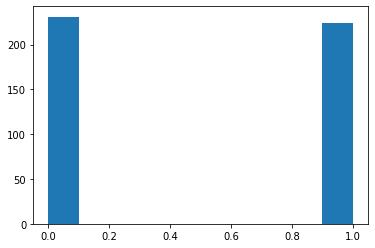

In [25]:

plt.hist(y)
plt.show()

In [26]:
from collections import Counter

Counter(y)

Counter({1: 224, 0: 231})

In [27]:
params_grid = [
              {
                'estimator':[LogisticRegression()],
                'estimator__penalty': ['l1', 'l2'],
                },
                {
                'estimator':[SVC()],
                'estimator__C': [0.1, 1, 10],
                 'estimator__kernel': ['linear', 'rbf'],
                },
                {
                'estimator': [RandomForestClassifier()],
                'estimator__n_estimators': [50, 250],
                'estimator__max_depth': [3,10],
                },
               ]

best parameters {'estimator': SVC(C=1, kernel='linear'), 'estimator__C': 1, 'estimator__kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.70      0.71      0.70        45
           1       0.71      0.70      0.70        46

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.70      0.70      0.70        91

Test ROC AUC Score: 0.7033816425120774
CPU times: user 161 ms, sys: 15.1 ms, total: 176 ms
Wall time: 1.09 s


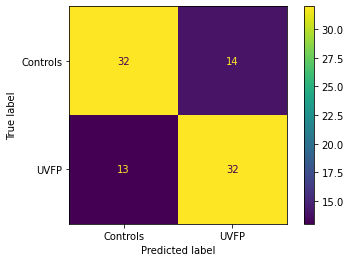

In [28]:
%%time
toy = True

# if toy:
#   m = 1000
#   X_depression_toy, y_depression_binary_toy = zip(*random.sample(list(zip(X_depression, y_depression_binary)), m))
#   X_train, X_test, y_train, y_test = train_test_split(X_depression_toy, y_depression_binary_toy, test_size=0.2, random_state=42)
# else:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('normalize', StandardScaler()),
    ('estimator', LogisticRegression())
    ])#initialize with any classifier

# Train the grid search model
gs = GridSearchCV(pipeline, params_grid, cv=5, n_jobs=-1, scoring='f1').fit(X_train, y_train)
# Best performing model and its corresponding hyperparameters
print('best parameters', gs.best_params_)
# Test data performance
y_pred = gs.predict(X_test)
result = permutation_importance(gs, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=-1)
print(classification_report(y_pred, y_test))
print("Test ROC AUC Score:",roc_auc_score(y_pred, y_test))


from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = gs.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm,display_labels = ['Controls', 'UVFP']).plot()


### Bootstrapping

In [29]:
from sklearn.linear_model import LogisticRegressionCV, SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
models = [
    LogisticRegressionCV(solver='liblinear', penalty = 'l1', max_iter = 100),
    SGDClassifier(loss='log', penalty="elasticnet", early_stopping=True, max_iter = 5000),
    MLPClassifier(alpha = 1, max_iter= 1000),
    RandomForestClassifier(n_estimators= 100)
]


names = ['LogisticRegressionCV', 'SGDClassifier', "MLPClassifier","RandomForestClassifier"]

In [30]:
X.shape

(455, 4)

In [39]:
import random


In [45]:
y_train.shape

(364,)

In [46]:
y_train_shuffled = random.shuffle(y_train)
y_train_shuffled.shape

AttributeError: 'NoneType' object has no attribute 'shape'

In [49]:
y_train

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,

In [55]:
%%time 
toy = False
if toy:
  n_bootstraps = 3
else:
  n_bootstraps = 50

# bs = cross_validation.Bootstrap(len(y), n_bootstraps=n_bootstraps, random_state=123,n_test = 0.2) # or add source code

permutation_test = True


y_pred_all = {}
roc_auc_all = {}
roc_auc_all_null = {}
for model, name in zip(models, names):
    print(model, '...')
    y_pred_all[name] = []
    roc_auc_all[name] = []
    roc_auc_all_null[name] = []
    pipe = Pipeline(steps=[
          ('scaler', StandardScaler()), 
          ('model', model)])

    ## Performing bootstrapping
    for i in range(n_bootstraps):
      #Split the data into training and testing set
      # Chaning the seed value for each iteration
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42+i)

        # for train_index, test_index in bs:
        #   X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        pipe.fit(X_train,y_train)

        # Test     
        y_pred = pipe.predict(X_test)
        roc_auc = roc_auc_score(y_test,y_pred)
        y_pred_all[name].append(y_pred)
        roc_auc_all[name].append(roc_auc)

        if permutation_test:
            y_train_shuffled = random.sample(list(y_train), len(y_train))     
            pipe_null = Pipeline(steps=[
              ('scaler', StandardScaler()), 
              ('model', model)])
            pipe_null.fit(X_train,y_train_shuffled)
            y_pred_null = pipe_null.predict(X_test)
            roc_auc_null = roc_auc_score(y_test,y_pred_null)
            roc_auc_all_null[name].append(roc_auc_null)


LogisticRegressionCV(penalty='l1', solver='liblinear') ...


/Users/danielmlow/miniconda3/envs/pydra/lib/python3.7/site-packages/sklearn/svm/_base.py:975: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/danielmlow/miniconda3/envs/pydra/lib/python3.7/site-packages/sklearn/svm/_base.py:975: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/danielmlow/miniconda3/envs/pydra/lib/python3.7/site-packages/sklearn/svm/_base.py:975: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/danielmlow/miniconda3/envs/pydra/lib/python3.7/site-packages/sklearn/svm/_base.py:975: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/danielmlow/miniconda3/envs/pydra/lib/python3.7/site-packages/sklearn/svm/

SGDClassifier(early_stopping=True, loss='log', max_iter=5000,
              penalty='elasticnet') ...
MLPClassifier(alpha=1, max_iter=1000) ...
RandomForestClassifier() ...
CPU times: user 57.7 s, sys: 54.7 s, total: 1min 52s
Wall time: 48.9 s


<Figure size 3600x2400 with 0 Axes>

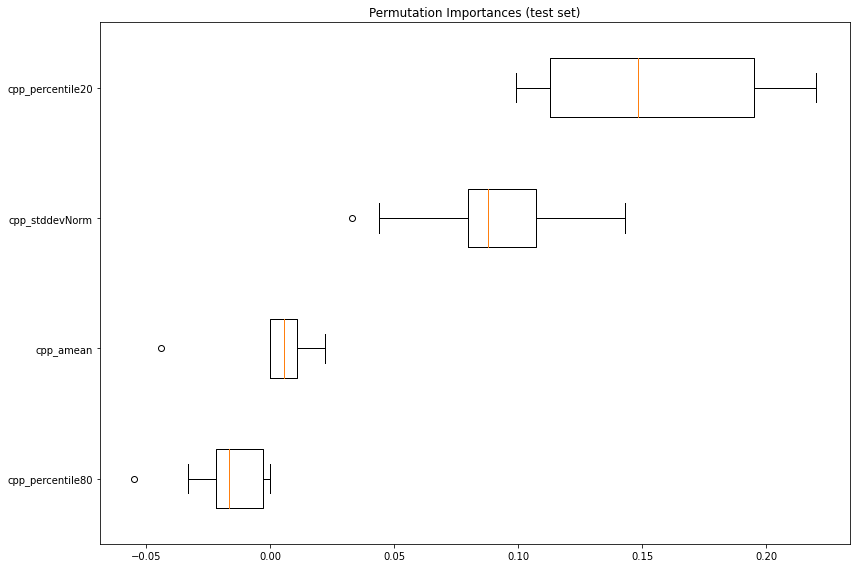

In [34]:
result = permutation_importance(pipe, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=-1)
from matplotlib.pyplot import figure

figure(figsize=(12,8), dpi=300)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
fig.set_size_inches(12,8)
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=np.array(variables)[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

In [37]:
filename = 'annotations_models_y_pred_egemaps_cpp_alone_vowel'

In [71]:
# egemaps+CPP
cols = []
df_results = []
for name in names:
    scores = roc_auc_all.get(name)
    scores_null = roc_auc_all_null.get(name)
    roc_auc_median_null = np.round(np.median(scores_null),2)
    
    roc_auc_median = np.round(np.median(scores),2)
    roc_auc_5 = np.round(np.percentile(scores, 5),2)
    roc_auc_95 = np.round(np.percentile(scores, 95),2)
    print(name)
    cols.append(name)
    result = f'{roc_auc_median} ({roc_auc_5}–{roc_auc_95}; {roc_auc_median_null})'.replace('0.', '.')
    print(result)
    df_results.append(result)

pd.DataFrame(y_pred_all).to_csv(output_dir+filename+'.csv')
df_results = pd.DataFrame(df_results, index=cols).T
df_results = df_results[['LogisticRegressionCV', 'MLPClassifier', 'RandomForestClassifier', 'SGDClassifier']]
df_results

LogisticRegressionCV
.81 (.75–.87; .5)
SGDClassifier
.77 (.46–.84; .35)
MLPClassifier
.8 (.74–.87; .57)
RandomForestClassifier
.77 (.7–.81; .48)


,LogisticRegressionCV,MLPClassifier,RandomForestClassifier,SGDClassifier
0,.81 (.75–.87; .5),.8 (.74–.87; .57),.77 (.7–.81; .48),.77 (.46–.84; .35)


,LogisticRegressionCV,MLPClassifier,RandomForestClassifier,SGDClassifier
0,.81 (.75–.87),.8 (.74–.87),.77 (.7–.81),.77 (.46–.84)


In [91]:
# noise + loudness
for name in names:
  scores = roc_auc_all.get(name)
  roc_auc_median = np.round(np.median(scores),2)
  roc_auc_5 = np.round(np.percentile(scores, 5),2)
  roc_auc_95 = np.round(np.percentile(scores, 95),2)
  print(name, roc_auc_median, roc_auc_5, roc_auc_95)

pd.DataFrame(y_pred_all).to_csv(output_dir+'annotations_models_y_pred_noise_loudness.csv')


LogisticRegressionCV 0.76 0.59 0.86
SGDClassifier 0.68 0.43 0.81
MLPClassifier 0.77 0.61 0.87
RandomForestClassifier 0.74 0.63 0.81


In [87]:
# noise
for name in names:
  scores = roc_auc_all.get(name)
  roc_auc_median = np.round(np.median(scores),2)
  roc_auc_5 = np.round(np.percentile(scores, 5),2)
  roc_auc_95 = np.round(np.percentile(scores, 95),2)
  print(name, roc_auc_median, roc_auc_5, roc_auc_95)

pd.DataFrame(y_pred_all).to_csv(output_dir+'annotations_models_y_pred_noise.csv')


LogisticRegressionCV 0.63 0.49 0.81
SGDClassifier 0.55 0.5 0.71
MLPClassifier 0.64 0.49 0.76
RandomForestClassifier 0.65 0.44 0.74


In [40]:
# cape v
for name in names:
  scores = roc_auc_all.get(name)
  roc_auc_median = np.round(np.median(scores),2)
  roc_auc_5 = np.round(np.percentile(scores, 5),2)
  roc_auc_95 = np.round(np.percentile(scores, 95),2)
  print(name, roc_auc_median, roc_auc_5, roc_auc_95)



LogisticRegressionCV 0.8 0.69 0.88
SGDClassifier 0.8 0.48 0.91
MLPClassifier 0.81 0.71 0.9
RandomForestClassifier 0.84 0.71 0.94


In [43]:
output_dir

'/content/drive/My Drive/datum/vfp/data/output/'

In [46]:
pd.DataFrame(y_pred_all).to_csv(output_dir+'annotations_models_y_pred_cape_v.csv')


# Permutation importance

# SHAP

In [48]:
!pip install -q shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 10.3 MB/s eta 0:00:0000:01


In [51]:
import shap

In [58]:
len(variables)

23

In [57]:
np.array(shap_values).shape

(2, 91, 23)

In [52]:
shap.initjs()

explainer = shap.KernelExplainer(pipe.predict_proba, X_train)
shap_values = explainer.shap_values(X_test)
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test)

Using 364 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!


In [52]:
variables

['severity',
 'roughness',
 'breathiness',
 'strain',
 'pitch',
 'loudness (in person)']

In [51]:
# shap.initjs()
# import shap
# explainer = shap.KernelExplainer(pipe.predict_proba, X_train)
# shap_values = explainer.shap_values(X_test)
# shap.force_plot(explainer.expected_value[0], shap_values[0], X_test)

  0%|          | 0/31 [00:00<?, ?it/s]

In [77]:
# explainer = shap.KernelExplainer(pipe.predict, shap.kmeans(X_train, 5))
# shaps = explainer.shap_values(X_test)

  0%|          | 0/31 [00:00<?, ?it/s]

In [83]:
shaps.mean(axis=0)

array([ 0.01189068, -0.00687724,  0.05373208,  0.00265681,  0.00861111,
        0.08885753])

In [66]:

model = RandomForestClassifier(n_estimators= 100).fit(X,y)

maskers = shap.maskers.Independent(X, max_samples=151)

explainer = shap.Explainer(model, maskers)
shap_values = explainer(X, check_additivity=False)

In [73]:
len(shap_values[1])

6

In [74]:
shap.plots.bar(shap_values)
# shap.plots.beeswarm(shap_values)


TypeError: ignored

In [59]:

len(shap_values)

2

In [53]:
sample_ind = 1

shap.plots.waterfall(shap_values[sample_ind], max_display=1)

TypeError: 'module' object is not callable

In [54]:
shap.waterfall_plot(explainer.base_values[0], values[0], X[0])

AttributeError: 'KernelExplainer' object has no attribute 'base_values'

TypeError: ignored

<Figure size 3600x2400 with 0 Axes>

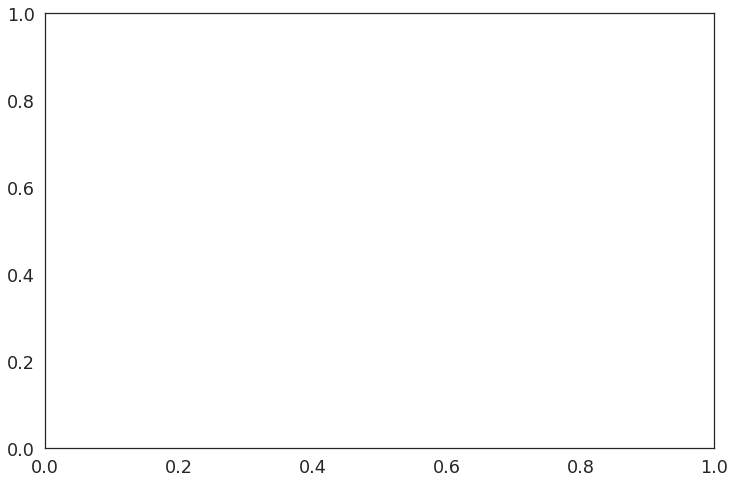

In [27]:
from matplotlib.pyplot import figure

figure(figsize=(12,8), dpi=300)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
fig.set_size_inches(12,8)
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=variables[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

In [ ]:
for train_index, test_index in bs:
...    print "TRAIN:", train_index, "TEST:", test_index

Extensions
- feature importance: permutation importance, LOFO
- Generalized Additive Model
- Speech, vision data
- RandomizedSearchCV instead of GridSearchCV
- autoML and auto sklearn
- nested cross-validation for hyperparameter tuning
- repeated measures
  - group shuffle split
  - time series cross-validation 